In [1]:
%load_ext autoreload
%autoreload 2

from dlp.dataset import Dataset
from dlp.visualizer import Visualizer

from parksim.route_planner.graph import WaypointsGraph

from pathlib import Path

import matplotlib.pyplot as plt

from parksim.route_planner.a_star import AStarPlanner

## Load Dataset

In [2]:
# Load dataset
ds = Dataset()

home_path = str(Path.home())
ds.load(home_path + '/dlp-dataset/data/DJI_0012')

## Pyplot Visualizer

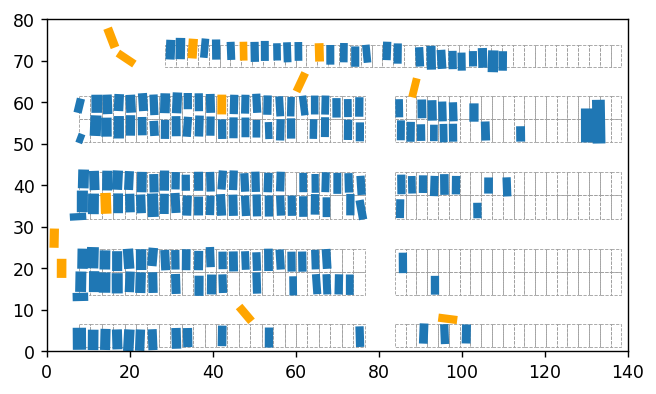

In [3]:
# Instantiate the visualizer object
vis = Visualizer(ds)

# Plot frame
scene = ds.get('scene', ds.list_scenes()[0])
ax = vis.plot_frame(scene['first_frame'])
plt.show()

## Waypoints as a graph

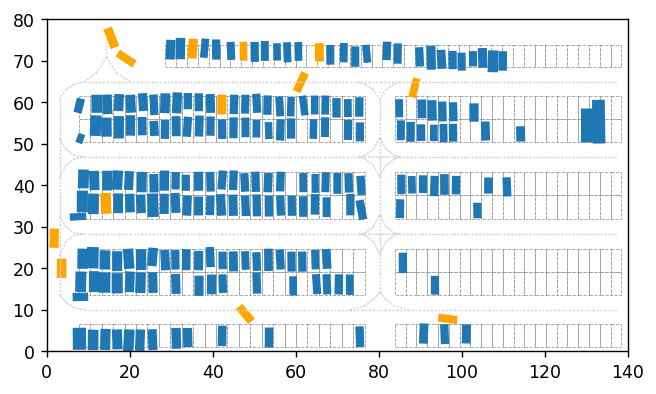

In [4]:
graph = WaypointsGraph()
graph.setup_with_vis(vis)

plt_ops = {"color": 'lightgrey', "linewidth": 0.75, "linestyle": 'dotted'}
ax = graph.plot(plt_ops=plt_ops)
ax = vis.plot_frame(scene['first_frame'], ax=ax)
plt.show()

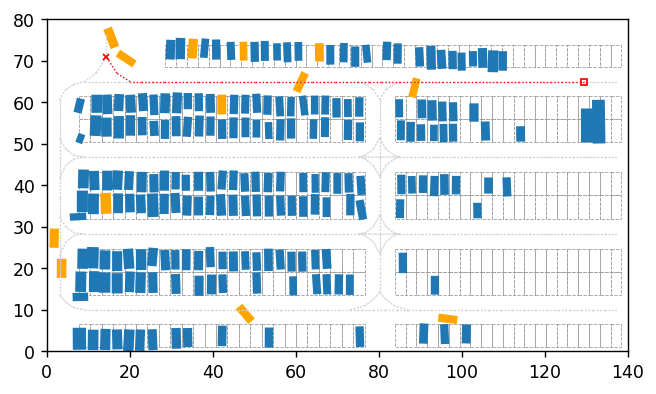

In [5]:
plt_ops = {"color": 'lightgrey', "linewidth": 0.75, "linestyle": 'dotted'}
ax = graph.plot(plt_ops=plt_ops)

# Solve A* path
planner = AStarPlanner(graph.vertices[30], graph.vertices[-3])
graph_sol = planner.solve()

plt_ops = {"color": 'red', "linewidth": 0.75, "linestyle": 'dotted'}
ax = vis.plot_frame(scene['first_frame'], ax=ax)
ax = graph_sol.plot(ax=ax, plt_ops=plt_ops)
plt.show()